In [127]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
with open('output/levenshtein.json','r') as out:
    for line in out:
        data_1 = json.loads(line)

In [51]:
with open('output/levenshtein_soundex.json','r') as out:
    for line in out:
        data_2 = json.loads(line)

In [52]:
with open('output/levenshtein_metaphone.json','r') as out:
    for line in out:
        data_3 = json.loads(line)

In [53]:
levenshtein = pd.DataFrame(data_1)
levenshtein_soundex = pd.DataFrame(data_2)
levenshtein_metaphone = pd.DataFrame(data_3)

In [111]:
# Count candidates length for each token
levenshtein['candidate_len'] = levenshtein_soundex.candidates.str.len()
levenshtein_soundex['candidate_len'] = levenshtein_soundex.candidates.str.len()
levenshtein_metaphone['candidate_len'] = levenshtein_metaphone.candidates.str.len()

In [121]:
def compute_analysis(ds_1, part):
    candidates = ds_1.query('candidate_len > 0')
    is_correct = candidates.query('is_correct == True')
    
    precision = float(is_correct.token.count()) / float(candidates.token.count())
    recall = float(is_correct.token.count()) / float(ds_1.token.count())
    
    mean = candidates.candidate_len.mean()
    maximum = candidates.candidate_len.max()
    
    result = {
        "part": part,
        "precision": precision,
        "recall": recall,
        "mean": mean,
        "max": maximum
    }
    
    return result

In [125]:
# combine analysis
combine_results = []
combine_results.append(compute_analysis(levenshtein, "levenshtein"))
combine_results.append(compute_analysis(levenshtein_soundex, "levenshtein_soundex"))
combine_results.append(compute_analysis(levenshtein_metaphone, "levenshtein_metaphone"))

combine_results = pd.DataFrame(combine_results)
combine_results[['part','precision','recall','max', 'mean']]

,part,precision,recall,max,mean
0,levenshtein,0.851095,0.727840,6,1.230657
1,levenshtein_soundex,0.849635,0.726592,6,1.230657
2,levenshtein_metaphone,0.852290,0.720350,4,1.149188


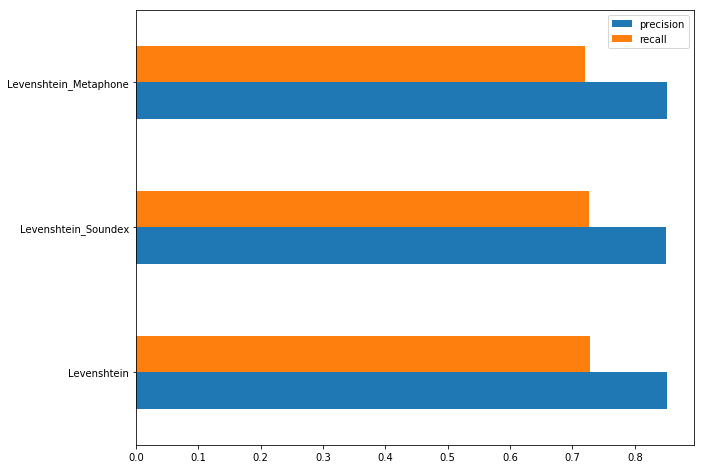

In [152]:
rects = combine_results[['part','precision', 'recall']].plot(kind='barh', legend=True, figsize=(10, 8));
rects.set_yticklabels(('Levenshtein','Levenshtein_Soundex','Levenshtein_Metaphone'))
plt.show()

{'max': 4,
 'mean': 1.1491875923190547,
 'precision': 0.8522895125553914,
 'recall': 0.7203495630461922}